# Formel zur Berechnung des Querschnitts

A = (2∗L∗I∗cos) / (y∗Ua)

A   := Querschnitt in mm²  
2   := Faktor für Wechselstrom  
L   := Leitungslänge in Meter  
I   := Strom in Ampere  
cos := Wirkstrom, 1 -> 100% Wirkstrom  
y   := Leitwert in m / (Ω * mm²)  
Ua  := Zulässiger absoluter Spannungsfall in Volt  

y(Kufper) := 56 

In [1]:
import math

In [2]:
def querschnitt(spannung, strom, länge, leitwert=56, spannungsfall_in_prozent=2, phasen=2, cos=1):
    Ua = spannung / 100 * spannungsfall_in_prozent
    if phasen> 2:
        phasen = math.sqrt(phasen)
    return (2 * länge * strom * cos) / (leitwert * Ua)

## Berechnung des Querschnitts
Angenommen es wird mit einer Spannung von 12V gearbeitet und die Leitungen werden mit einer Leistung von 100 Watt belastet. Ausgerechnet sind das dann 100W / 12V = 8.33A. Nimmt man z.B. die doppelte Spannung, halbiert sich der Strom: 100W / 24V = 4.17A

Die Leitung soll 4.5 Meter lang sein und der Spannungsfall darf nur 2% von 12V betragen, also 0,24V auf 4.5 Meter.


Zuerst rechnen wir aber den Querschnitt für das erste Beispiel aus:

In [3]:
U = 12
I = 8.33
L = 4.5
A = querschnitt(U, I, L)
print(f'Minimaler zulässiger Querschnitt: {A:.2f} mm²')

Minimaler zulässiger Querschnitt: 5.58 mm²


## Verhältnis: Betriebspannung zum Querschnitt bei gleicher Leistung

Angeonommen verschiedene Verbraucher mit unterschiedlichen Betriebsspannungen benötigen alle 100W.  
Um aus Leistungen und Spannung wieder den resultierenden Strom zu berechnen, gibt es eine einfache Formel.  

I = P / U

Als Beispiel rechne ich mal die Ströme folgender Betriebsspannungen aus:  
5V, 12V, 24V, 230V

In [4]:
P = 100
Spannungen = [5, 12, 24, 230]
Ströme = [P / U for U in Spannungen]
for u, i in zip(Spannungen, Ströme):
    print(f'{u:3.0f}V {i:5.2f}A == {u*i:.0f}W')

  5V 20.00A == 100W
 12V  8.33A == 100W
 24V  4.17A == 100W
230V  0.43A == 100W


## Visualisierung

In [5]:
import matplotlib.pyplot as plt

In [6]:
def visualisierung(Spannungen, P, L):
    Ströme = [P / U for U in Spannungen]
    Querschnitte = [querschnitt(u, i, L) for u, i in zip(Spannungen, Ströme)]

    plt.figure(figsize=(20, 10))

    plt.subplot(121)
    plt.title(f'Spannung vs Strom\nLeistung = {P}W')
    plt.plot(Spannungen, Ströme)
    plt.grid()
    plt.xlabel('Spannung in V')
    plt.ylabel('Strom in A')

    plt.subplot(122)
    plt.title(f'Spannung vs Querschnitt\nLeistung = {P}W')
    plt.plot(Spannungen, Querschnitte)
    plt.grid()
    plt.xlabel('Spannung in V')
    plt.ylabel('Querschnitt in mm²')

    plt.show()

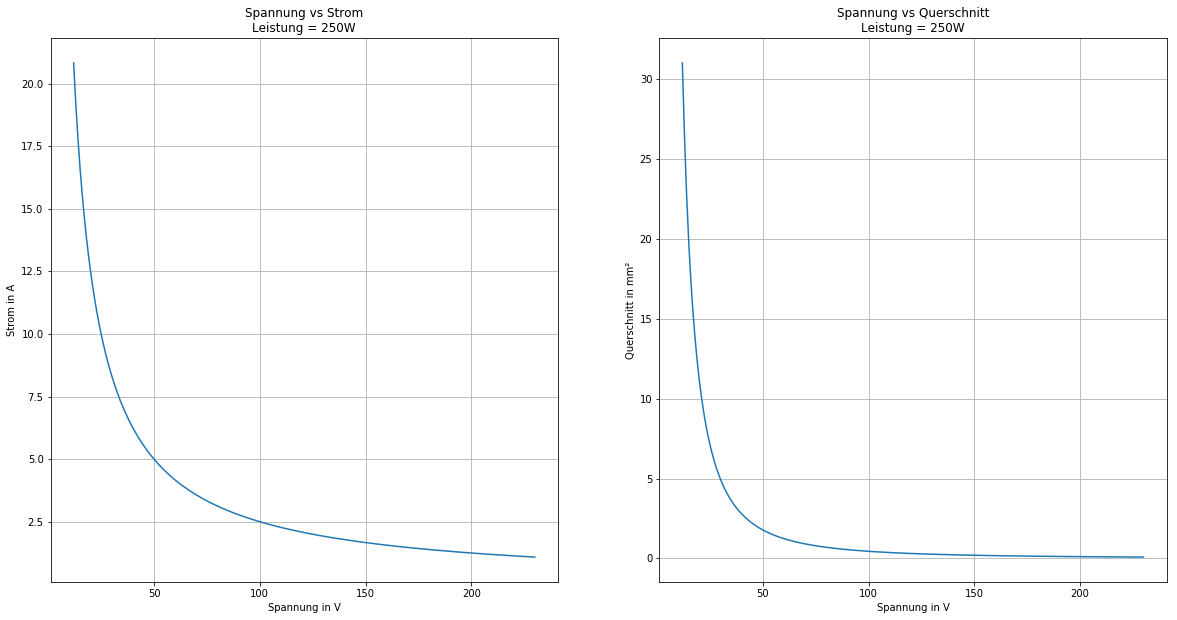

In [7]:
Spannungen = list(range(12, 231)) # 12 V - 230 V
visualisierung(Spannungen, P=250, L=10)

In [8]:
# Genormte Leiterquerschnitte
IEC_60228 = [
    0.5,
    0.75,
    1.0,
    1.5,
    2.5,
    4.0,
    6.0,
    10.0,
    16.0,
    25.0,
    35.0,
    50.0,
    70.0,
    95.0,
    120.0,
    150.0,
    185.0,
    240.0,
    300.0,
    400.0,
    500.0,
    630.0,
    800.0,
    1000.0
]

In [9]:
U = 12 # Volt
P = 250 # Watt
I = P / U # Ampere
L = 10 # Meter
A = querschnitt(U, I, L)

print(f'Bei einer Betriebsspannung von {U}V mit einer Last von {P}W, fließt ein Strom von {I:.2f}A')
print(f'Der minimale Leiterquerschnitt bei {L}m Leitungslänge beträgt {A:.2f}mm²')
for a in IEC_60228:
    if a > A:
        print(f'Es müssen Leitungen mit {a}mm² querschnitt verwendet werden')
        break
else:
    print(
        f'Sorry, einen genormten Leiterquerschnitt über {A}mm² gibt es nicht.\n'
        'Supraleiter wären eine mögliche Lösung.'
    )


Bei einer Betriebsspannung von 12V mit einer Last von 250W, fließt ein Strom von 20.83A
Der minimale Leiterquerschnitt bei 10m Leitungslänge beträgt 31.00mm²
Es müssen Leitungen mit 35.0mm² querschnitt verwendet werden
